# IAB딥러닝 9월 19일 
> Overview - Assignment

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김준형

In [1]:
from fastai.vision.all import *
from fastai.collab import *
from fastai.text.all import *

# 1. 이미지자료분석

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
dls = ImageDataLoaders.from_folder(path, suffle = False)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


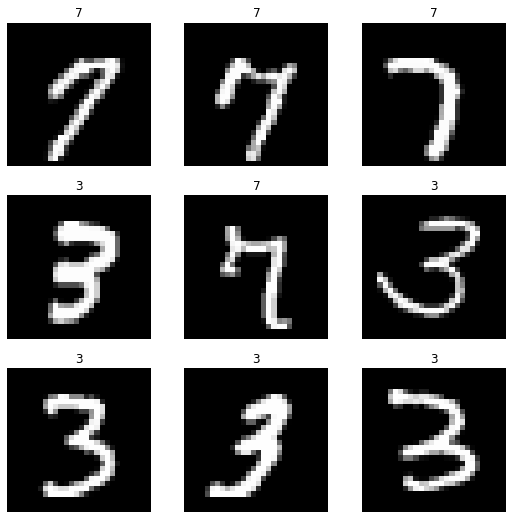

In [5]:
dls.show_batch()

`-` cnn_learner를 이용하여 lrnr 오브젝트 생성
  - arch = resnet34
  - metrics = error_rate

In [7]:
lrnr = vision_learner(dls, arch = resnet34, metrics = error_rate)

In [8]:
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.290875,0.139522,0.046614,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.053940,0.020497,0.006869,00:13


In [9]:
X, y = dls.one_batch()

In [10]:
X.shape
# 64개의 이미지, 3채널, (28, 28)크기

torch.Size([64, 3, 28, 28])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

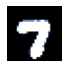

In [11]:
show_image(X[0])

In [12]:
lrnr.model(X[0].reshape(1, 3, 28, 28))

TensorBase([[-4.9088,  5.3898]], device='cuda:0', grad_fn=<AliasBackward0>)

In [13]:
import numpy as np
a = np.exp(-4.9088)
b = np.exp(5.3898)
print('3일 확률 : ', a / (a + b))
print('7일 확률 : ', b / (a + b))

3일 확률 :  3.3679080176154866e-05
7일 확률 :  0.9999663209198238


In [14]:
lrnr.predict(X[0].to("cpu"))

('3', TensorBase(0), TensorBase([0.9966, 0.0034]))

# 2. 추천시스템

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')
df

,user,item,rating,item_name
0,1,15,1.084308,홍차5
1,1,1,4.149209,커피1
2,1,11,1.142659,홍차1
3,1,5,4.033415,커피5
4,1,4,4.078139,커피4
...,...,...,...,...
995,100,18,4.104276,홍차8
996,100,17,4.164773,홍차7
997,100,14,4.026915,홍차4
998,100,4,0.838720,커피4


### (1) 73번 유저가 먹은 아이템 및 평점을 출력하는 코드를 작성.

In [16]:
df.query('user == 73')

,user,item,rating,item_name
720,73,20,3.733853,홍차10
721,73,18,3.975004,홍차8
722,73,9,1.119541,커피9
723,73,13,3.840801,홍차3
724,73,2,0.943742,커피2
725,73,4,1.152405,커피4
726,73,1,0.887292,커피1
727,73,7,0.947641,커피7
728,73,6,0.868370,커피6
729,73,17,3.873590,홍차7


### (2) dls와 lrnr 오브젝트를 생성하고 lrnr 오브젝트를 학습.

In [17]:
dls = CollabDataLoaders.from_df(df)
lrnr = collab_learner(dls, y_range = (0, 5))

In [18]:
lrnr.fit(50)

epoch,train_loss,valid_loss,time
0,2.308994,2.355548,00:00
1,2.306565,2.353840,00:00
2,2.299696,2.340409,00:00
3,2.280939,2.298518,00:00
4,2.246671,2.214348,00:00
5,2.189545,2.079250,00:00
6,2.106238,1.893685,00:00
7,1.993163,1.668546,00:00
8,1.851504,1.418325,00:00
9,1.686607,1.162084,00:00


### (3) 데이터프레임 생성

In [20]:
df_new = pd.DataFrame({'user':[73] * 20, 'item':range(1,21)})
df_new

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


### (4) 73번 유저의 취향 파악

In [22]:
_dl = dls.test_dl(df_new)
lrnr.get_preds(dl = _dl)

(tensor([0.9909, 1.0178, 1.0145, 1.0174, 0.9919, 0.9393, 1.0213, 1.0092, 1.0326,
         0.9973, 3.8045, 3.8595, 3.8676, 3.8691, 3.8351, 3.8488, 3.8202, 3.8834,
         3.7705, 3.8070]),
 None)

# 3. 시퀀스자료분석

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-19-human_numbers_100.csv')
df

,Unnamed: 0,text
0,0,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1,1,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
2,2,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
3,3,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
4,4,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
...,...,...
1995,1995,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1996,1996,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thi

### (1) TextDataLoaders.from_df을 이용하여 dls 오브젝트 생성

In [24]:
dls = TextDataLoaders.from_df(df, is_lm = True, seq_len = 5, text_col = 'text')
dls.show_batch()

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


,text,text_
0,"xxbos one , two ,","one , two , three"
1,"hundred xxbos one , two","xxbos one , two ,"
2,"one hundred xxbos one ,","hundred xxbos one , two"
3,", one hundred xxbos one","one hundred xxbos one ,"
4,"nine , one hundred xxbos",", one hundred xxbos one"
5,"ninety nine , one hundred","nine , one hundred xxbos"
6,", ninety nine , one","ninety nine , one hundred"
7,"eight , ninety nine ,",", ninety nine , one"
8,"ninety eight , ninety nine","eight , ninety nine ,"


### (2) lrnr 오브젝트 생성 (arch = AWD_LSTM, metrics = accuracy)

In [25]:
lrnr = language_model_learner(dls, arch = AWD_LSTM, metrics = accuracy)

### (3) lrnr 오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습

In [26]:
lrnr.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.541494,0.157192,0.977558,00:52


epoch,train_loss,valid_loss,accuracy,time
0,0.026514,0.004046,0.999242,00:55
1,0.002075,0.002533,0.999315,00:55
2,0.001414,0.002281,0.999324,00:55


In [27]:
lrnr.predict('one, two,', n_words = 50)

'one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirteen , fourteen , fifteen , sixteen , seventeen , eighteen , nineteen , twenty , twenty one , twenty two , twenty three , twenty four , twenty five'

In [28]:
lrnr.predict('twenty, twenty one,', n_words = 50)

'twenty , twenty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight , thirty nine , forty , forty one , forty two , forty three , forty four , forty five , forty six , forty seven , forty eight ,'

`-` IAB 딥러닝 수업 자료를 기반으로 공부한 내용입니다.